# **Name- Prashant Pal**
###(Machine Learning Intern - Mentorness)
###Batch – MIP-ML-10

--------------------------------------------------------------------------------------------------------------

## **Problem Statement: Market Price Prediction**

**Background:**
In the realm of market analysis and forecasting, understanding the intricate patterns within time series
data is paramount for informed decision-making. With the advent of machine learning techniques, it's
now possible to delve deeper into historical market data to predict future trends accurately. In this
context, we have at our disposal a dataset containing monthly market data spanning multiple years,
encompassing various regions, commodities, and pricing information.

\
**Objective:**
The primary objective of this project is to develop a robust time series machine learning model capable of
accurately forecasting market trends based on historical data. By leveraging advanced algorithms, we aim
to predict the quantity and prices of commodities for future months, empowering stakeholders to make
proactive decisions regarding production, procurement, pricing strategies, and resource allocation.

\
**Data Description:**

The dataset comprises the following columns:

*   month: The month for which the data is recorded.
*   year: The year corresponding to the recorded data.
*   quantity: The quantity of the commodity traded or available.
*   priceMin: The minimum price of the commodity during the month
*   priceMax: The maximum price of the commodity during the month.
*   priceMax: The maximum price of the commodity during the month.
*   priceMod: The mode or most frequently occurring price of the commodity during the month.
*   state: The state or region where the market is located.
*   city: The city where the market is situated
*   date: The specific date of the recorded data.

**Task:**\
The task involves several key steps:
1. Data Preprocessing: Cleaning the dataset, handling missing values, and encoding categorical variables.
2. Exploratory Data Analysis (EDA): Analyzing the temporal patterns, identifying seasonality, trends, and
anomalies within the data.
3. Feature Engineering: Creating relevant features such as lagged variables, rolling statistics, and seasonal
indicators.
4. Model Selection and Training: Evaluating various time series forecasting models such as ARIMA,
SARIMA, Prophet, and LSTM, selecting the most suitable one, and training it on the dataset.
5. Model Evaluation: Assessing the model's performance using appropriate metrics such as Mean Absolute
Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
6. Fine-tuning and Validation: Fine-tuning the model parameters, validating its performance on unseen
data, and iterating if necessary.

**Outcome:**
The ultimate goal is to deploy a production-ready machine learning model capable of generating accurate
forecasts for market quantity and prices for future months. The insights derived from this model will aid
stakeholders in making data-driven decisions, optimizing inventory management, pricing strategies, and
resource allocation, thereby enhancing overall efficiency and profitability in the market ecosystem.

--------------------------------------------------------------------------------

In [1158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1159]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1160]:
df=pd.read_csv('/content/drive/MyDrive/MarketPricePrediction.csv')   #Readin MarketPricePrediction.csv file

## **Data Preprocessing**

In [1161]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [1162]:
df.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


## **Finding missing values**

In [1163]:
print(df.isnull().sum())  # None missing values found

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64


In [1164]:
# # Encode categorical variables
# label_encoders = {}
# categorical_columns = ['market', 'state', 'city']
# for column in categorical_columns:
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])
#     label_encoders[column] = le

In [1165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [1166]:
df.columns=df.columns.str.lower() # converting all columns name in lower string
df

,market,month,year,quantity,pricemin,pricemax,pricemod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [1167]:
# Convert date column to datetime

df['date'] = pd.to_datetime(df['date'])
df.tail()

,market,month,year,quantity,pricemin,pricemax,pricemod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,2011-12-01
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,2012-12-01
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,2013-12-01
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,2014-12-01
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,2015-12-01


In [1168]:
df.info() # checking whether date column's data type has changed to datetime64 or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  object        
 1   month     10227 non-null  object        
 2   year      10227 non-null  int64         
 3   quantity  10227 non-null  int64         
 4   pricemin  10227 non-null  int64         
 5   pricemax  10227 non-null  int64         
 6   pricemod  10227 non-null  int64         
 7   state     10227 non-null  object        
 8   city      10227 non-null  object        
 9   date      10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 799.1+ KB


In [1169]:
# Set date as index

df.set_index('date', inplace=True)
df.head()

,market,month,year,quantity,pricemin,pricemax,pricemod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [1170]:
# Sort the data by date

df.sort_index(inplace=True)
df.head()

,market,month,year,quantity,pricemin,pricemax,pricemod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


In [1171]:
# Calculate Median Price for prediction later.

df['median_price'] = df[['pricemin', 'pricemax', 'pricemod']].median(axis=1)

In [1172]:
df.head()

,market,month,year,quantity,pricemin,pricemax,pricemod,state,city,median_price
date,,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,226.0
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,186.0
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,243.0
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,254.0
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,269.0


In [1173]:
df.columns

Index(['market', 'month', 'year', 'quantity', 'pricemin', 'pricemax',
       'pricemod', 'state', 'city', 'median_price'],
      dtype='object')

# **Exploratory Data Analysis**

### **1. Average Quantity and Median Price by State**

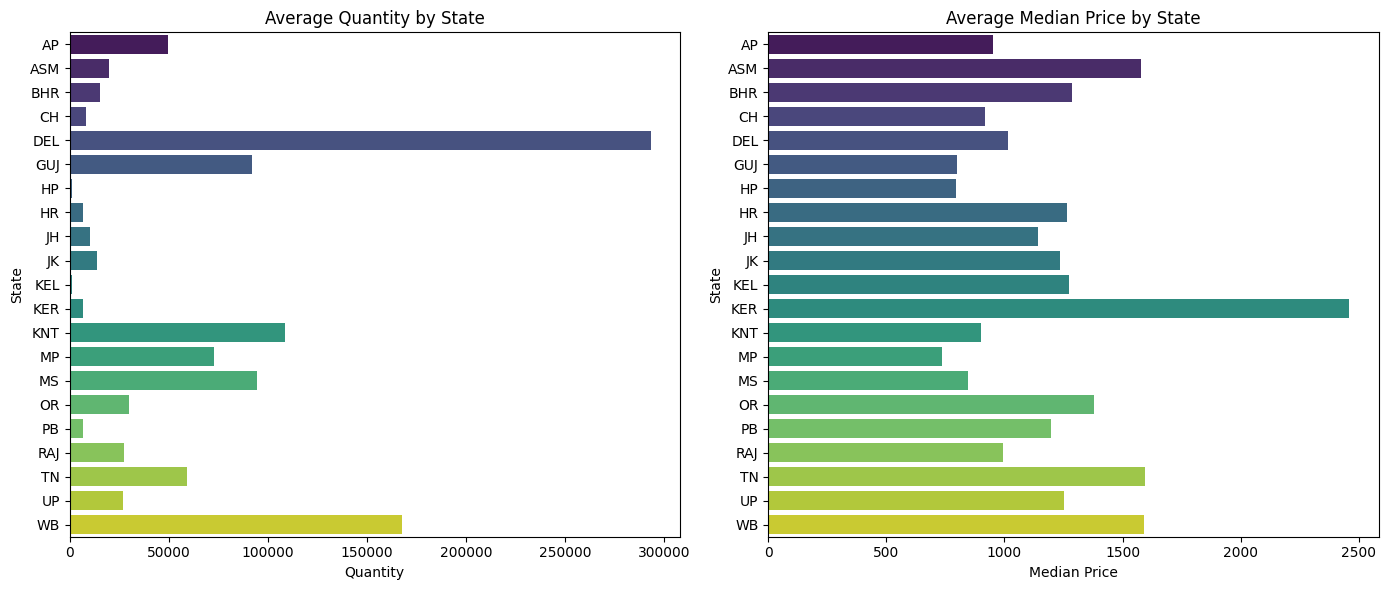

In [1174]:
# Calculate mean quantity and median price by state
state_agg = df.groupby('state')[['quantity', 'median_price']].mean().reset_index()

# Plotting figure
plt.figure(figsize=(14, 6))

# Quantity by State
plt.subplot(1, 2, 1)
sns.barplot(x='quantity', y='state', data=state_agg, palette='viridis')
plt.title('Average Quantity by State')
plt.xlabel('Quantity')
plt.ylabel('State')

# Median Price by State
plt.subplot(1, 2, 2)
sns.barplot(x='median_price', y='state', data=state_agg, palette='viridis')
plt.title('Average Median Price by State')
plt.xlabel('Median Price')
plt.ylabel('State')

plt.tight_layout()
plt.show()


### 2. Average Quantity and Median Price by City

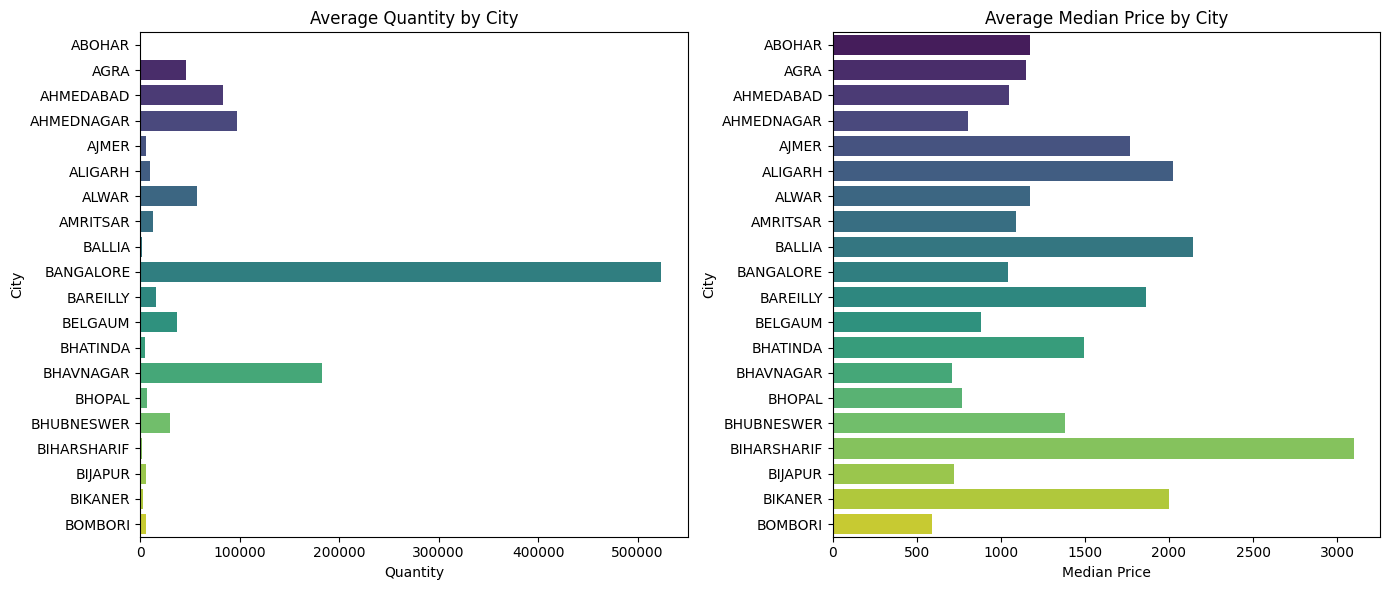

In [1175]:
# Calculate mean quantity and median price by city
city_agg = df.groupby('city')[['quantity', 'median_price']].mean().reset_index()

#  Plotting figure
plt.figure(figsize=(14, 6))

# Quantity by City
plt.subplot(1, 2, 1)
sns.barplot(x='quantity', y='city', data=city_agg.head(20), palette='viridis')  # Limiting to top 20 cities for readability
plt.title('Average Quantity by City')
plt.xlabel('Quantity')
plt.ylabel('City')

# Median Price by City
plt.subplot(1, 2, 2)
sns.barplot(x='median_price', y='city', data=city_agg.head(20), palette='viridis')  # Limiting to top 20 cities for readability
plt.title('Average Median Price by City')
plt.xlabel('Median Price')
plt.ylabel('City')

plt.tight_layout()
plt.show()


### **3. Average Quantity and Median Price by Year**

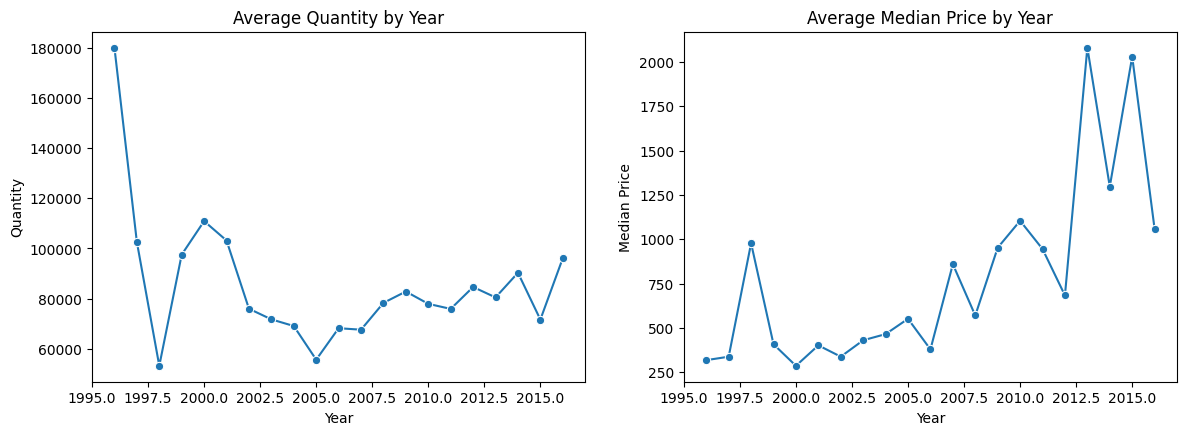

In [1176]:
# Calculate mean quantity and median price by year
year_agg = df.groupby('year')[['quantity', 'median_price']].mean().reset_index()

# Plotting

plt.figure(figsize=(14, 10))

# Quantity by Year
plt.subplot(2, 2, 3)
sns.lineplot(x='year', y='quantity', data=year_agg, marker='o', palette='viridis')
plt.title('Average Quantity by Year')
plt.xlabel('Year')
plt.ylabel('Quantity')

# Median Price by Year
plt.subplot(2, 2, 4)
sns.lineplot(x='year', y='median_price', data=year_agg, marker='o', palette='viridis')
plt.title('Average Median Price by Year')
plt.xlabel('Year')
plt.ylabel('Median Price')

plt.show()


### **4. Plotting the Seasonal (Monthly) Trends**

In [1181]:
# Create a new column for month names
df['month_name'] = df.index.month_name()

# Ensure the month_name column has the correct categorical order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Group by month and calculate the median_price
monthly_trends = df.groupby('month_name')['median_price'].median().reindex(month_order)

# Create a bar plot with a trend line using Plotly
fig = px.bar(x=monthly_trends.index, y=monthly_trends.values)

# Adding a trend line
fig.add_trace(go.Scatter(
    x=monthly_trends.index, y=monthly_trends.values, mode='lines+markers', name='Trend Line', line=dict(color='firebrick', width=2)))


fig.update_layout(title='Median price on Monthly basis',xaxis_title='Month',yaxis_title='Average Median Price',xaxis=dict(tickmode='linear'),width=1200,height=500)
fig.show()


### **5. Median Price Lineplot by Year**

Text(0.5, 0, 'Year')

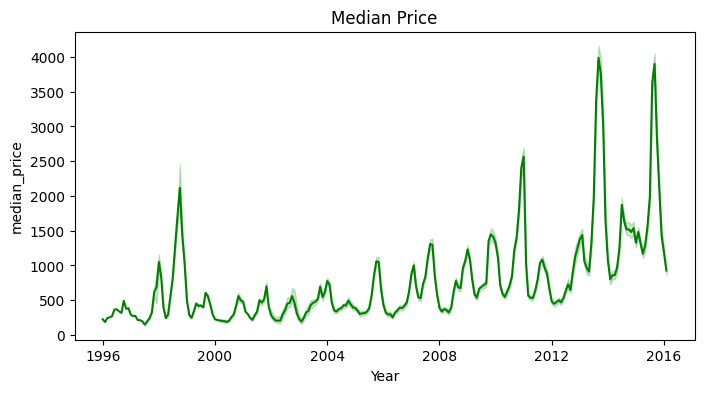

In [1183]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x=df.index, y='median_price',color='Green')
plt.title("Median Price")
plt.xlabel('Year')

### **6. Quantity Lineplot by Year**

Text(0.5, 0, 'Year')

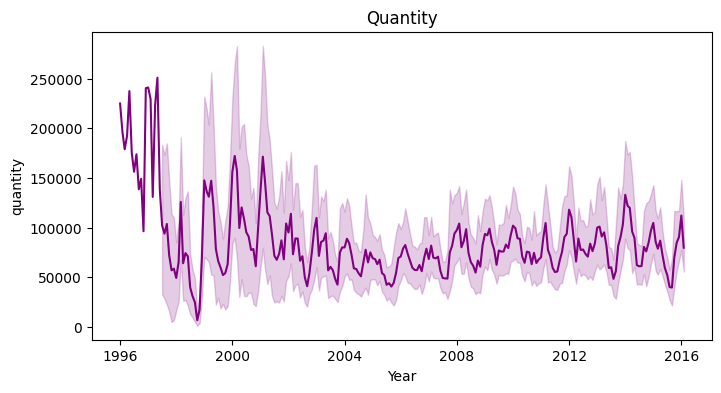

In [1185]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x=df.index, y='quantity',color='purple')
plt.title("Quantity")
plt.xlabel('Year')

### **7. Rolling Statistics**

In [931]:
#Rolling Statistics
df['median_price:12_rolling']=df['median_price'].rolling(12).mean()

In [932]:
df.head()

,market,month,year,quantity,pricemin,pricemax,pricemod,state,city,median_price,month_name,median_price:12_rolling
date,,,,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,226.0,January,NaN
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,186.0,February,NaN
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,243.0,March,NaN
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,254.0,April,NaN
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,269.0,May,NaN


<Axes: xlabel='date'>

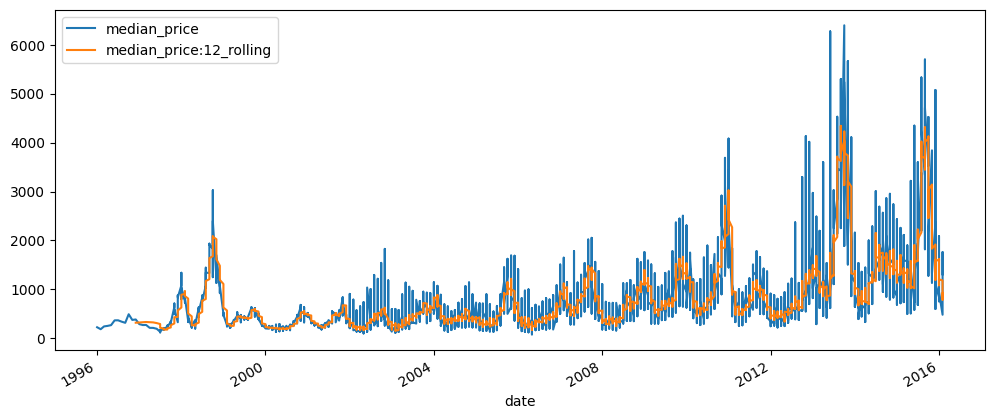

In [933]:
df[['median_price','median_price:12_rolling']].plot(figsize=(12,5))

#### 8. Box Plot of Median Prices by Month

In [934]:
# Add a month column for plotting
df['month'] = df.index.month

# Box plot using Plotly
fig = px.box(df, x='month', y='median_price', title='Median Prices by Month', labels={'month': 'Month', 'median_price': 'Median Price'})
fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(range(1, 13)),
                             ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),height=500)
fig.show()


#### **9. Plotting the Yearly Trend**

In [935]:
# Extract year from the index
df['year'] = df.index.year

# Group by year and calculate the mean median_price
yearly_trends = df.groupby('year')['median_price'].mean()

# Plot using Plotly
fig = px.line(yearly_trends, x=yearly_trends.index, y='median_price', title='Average Median Price by Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Median Price')
fig.show()

### **10. Heatmap of Median Prices by Month and Year**

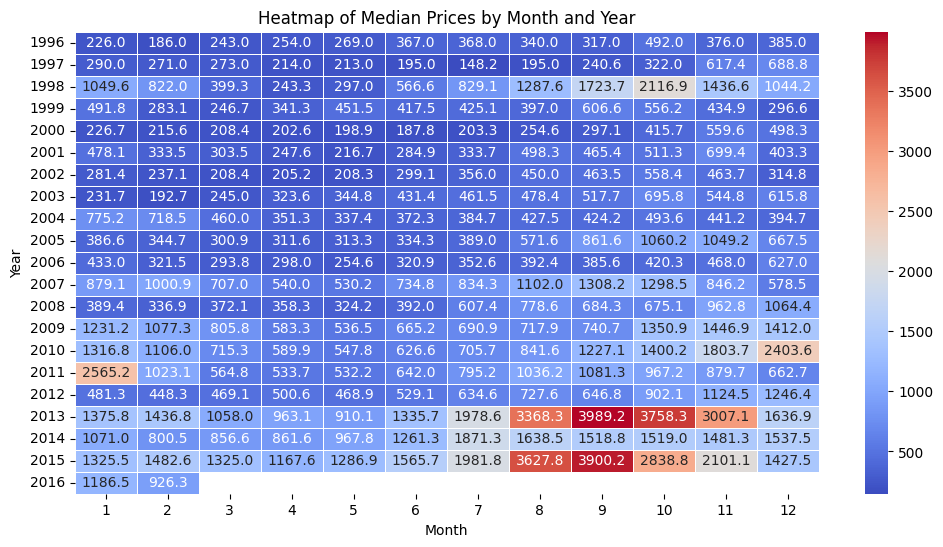

In [936]:
# Pivot table for heatmap
pivot = df.pivot_table(values='median_price', index=df.index.year, columns=df.index.month, aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Heatmap of Median Prices by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [937]:
df.columns

Index(['market', 'month', 'year', 'quantity', 'pricemin', 'pricemax',
       'pricemod', 'state', 'city', 'median_price', 'month_name',
       'median_price:12_rolling'],
      dtype='object')

In [938]:
# Dropping columns which are not neceesary for forecasting
df.drop(['market', 'month', 'year', 'pricemin', 'pricemax',
       'pricemod', 'state', 'city', 'median_price:12_rolling',
       'month_name'],axis=1,inplace=True)

In [939]:
df.head()

,quantity,median_price
date,,
1996-01-01,225063,226.0
1996-02-01,196164,186.0
1996-03-01,178992,243.0
1996-04-01,192592,254.0
1996-05-01,237574,269.0


In [940]:
df.tail()

,quantity,median_price
date,,
2016-02-01,4300,1077.0
2016-02-01,97178,575.0
2016-02-01,272527,730.0
2016-02-01,90142,806.0
2016-02-01,168020,1309.0


### **Removing duplicates (take mean for repeated dates) because we need to forecast on monthly basis**

In [941]:
# Remove duplicate indices by aggregating data
df = df.groupby(df.index).mean()

# If the index is not in datetime format, convert it
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df.index = pd.to_datetime(df.index)


<Axes: xlabel='date'>

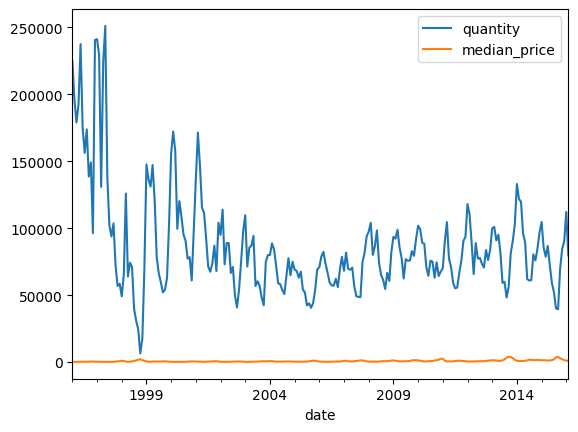

In [942]:
df.plot()

## **Seasonal decompose for Quantity**

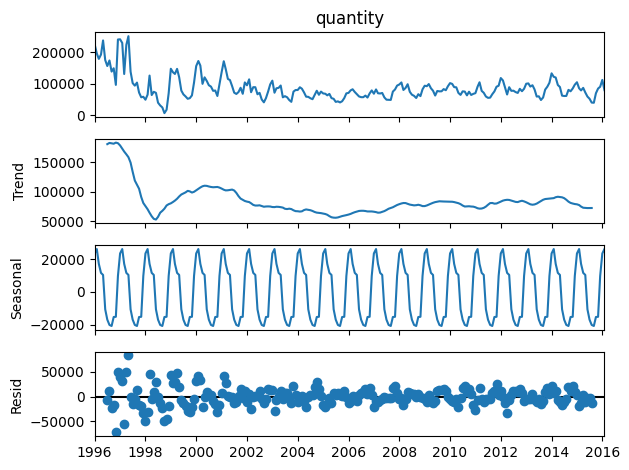

In [943]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data= seasonal_decompose(df['quantity'],model='additive')
decompose_data.plot();

In [944]:
# Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [945]:
test_result=adfuller(df['quantity'])

In [946]:
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(quantity):
    result=adfuller(quantity)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [947]:
adfuller_test(df['quantity'])

ADF Test Statistic : -6.082670116095265
p-value : 1.082777058260364e-07
#Lags Used : 15
Number of Observations Used : 226
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [948]:
# Create rolling statistics
df['quantity_roll_mean'] = df['quantity'].rolling(window=3).mean()
df['quantity_roll_std'] = df['quantity'].rolling(window=3).std()

In [949]:
import statsmodels.api as sm

## **Plotting ACF and PACF graphs for Quantity**

In [950]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

(-0.5, 1.5)

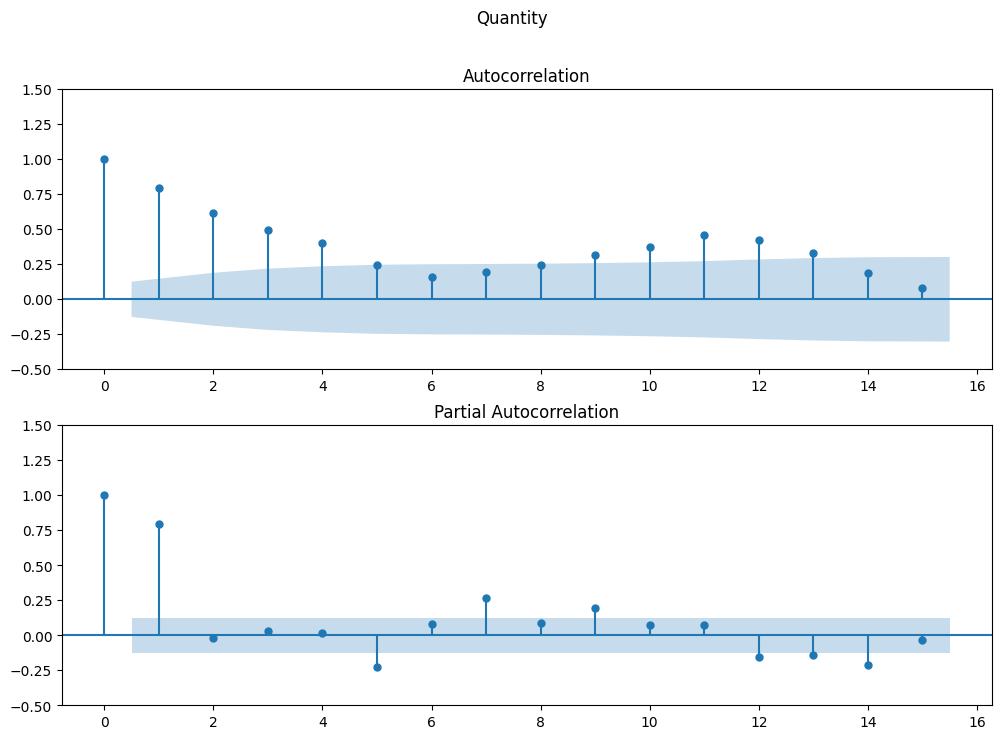

In [951]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Quantity')
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['quantity'].dropna(),lags=15,ax=ax1)
ax1.set_ylim(-0.50, 1.5)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['quantity'].dropna(),lags=15,ax=ax2)
ax2.set_ylim(-0.50, 1.5)

In [952]:
# upper and lower bound increasing shows increase in errors

## **ARIMA model for Quantity**

In [953]:
 # For non-seasonal data
#p=1, d=0, q=5
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df['quantity'],order=(1,0,5))
model_fit=model.fit()

In [954]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               quantity   No. Observations:                  242
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -2777.167
Date:                Thu, 30 May 2024   AIC                           5570.335
Time:                        12:21:50   BIC                           5598.246
Sample:                    01-01-1996   HQIC                          5581.578
                         - 02-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.685e+04   5472.085     15.872      0.000    7.61e+04    9.76e+04
ar.L1          0.4089      0.058      7.099      0.000       0.296       0.522
ma.L1          0.4546      0.059      7.768      0.000       0.340       0.569
ma.L2          0.3644      0.051      7.085      0.000       0.264       0.465
ma.L3          0.2367      0.039      6.060      0.000       0.160       0.313
ma.L4          0.4684      0.039     12.149      0.000       0.393       0.544
ma.L5          0.2988      0.037      7.995      0.000       0.226       0.372
sigma2      2.983e+08      0.813   3.67e+08      0.000    2.98e+08    2.98e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               627.30
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.7e+23. Standard errors may be unstable.
"""

In [955]:
df.drop(['quantity_roll_mean','quantity_roll_std'],axis=1,inplace=True)

In [956]:
df.tail()

,quantity,median_price
date,,
2015-10-01,69684.900000,2838.788889
2015-11-01,84584.707865,2101.056180
2015-12-01,90368.806452,1427.516129
2016-01-01,112143.650602,1186.457831
2016-02-01,79671.049383,926.345679


In [957]:
import datetime

In [958]:
# Generate forecast
start_date = datetime.datetime(2012, 12, 1)
end_date = datetime.datetime(2016, 2, 1)
forecasted_date= datetime.datetime(2017, 2, 1)

In [959]:
df['forecast']=model_fit.predict(start=start_date,end=end_date,dynamic=True)

fig = px.line(df, y=['quantity', 'forecast'], labels={'value': 'Values', 'variable': 'Legend'}, title='quantity vs Forecast')
fig.update_layout(width=800, height=400)
fig.show()

## **Calculating MAE, MSE, RMSE**

In [960]:
# Calculate error metrics
actual = df['quantity'][start_date:end_date]
forecast = df['forecast'][start_date:end_date]

ARIMA_Qty_mae = mean_absolute_error(actual, forecast)
ARIMA_Qty_mse = mean_squared_error(actual, forecast)
ARIMA_Qty_rmse = np.sqrt(ARIMA_Qty_mse)

print(f'ARIMA_Qty_MAE: {ARIMA_Qty_mae}')
print(f'ARIMA_Qty_MSE: {ARIMA_Qty_mse}')
print(f'ARIMA_Qty_RMSE: {ARIMA_Qty_rmse}')

ARIMA_Qty_MAE: 18077.99213946133
ARIMA_Qty_MSE: 515925661.36036867
ARIMA_Qty_RMSE: 22713.997036197055


In [961]:
df

,quantity,median_price,forecast
date,,,
1996-01-01,225063.000000,226.000000,NaN
1996-02-01,196164.000000,186.000000,NaN
1996-03-01,178992.000000,243.000000,NaN
1996-04-01,192592.000000,254.000000,NaN
1996-05-01,237574.000000,269.000000,NaN
...,...,...,...
2015-10-01,69684.900000,2838.788889,86854.922141
2015-11-01,84584.707865,2101.056180,86854.922141
2015-12-01,90368.806452,1427.516129,86854.922141


## **SARIMAX model for Quantity**

In [962]:
model=sm.tsa.statespace.SARIMAX(df['quantity'],order=(1, 0, 5),seasonal_order=(1,1,1,12))
results=model.fit()

In [963]:
import plotly.express as px

In [964]:
df['forecast']=results.predict(start=start_date,end=end_date,dynamic=True)

fig = px.line(df, y=['quantity', 'forecast'], labels={'value': 'Values', 'variable': 'Legend'}, title='Quantity vs Forecast')
fig.update_layout(width=800, height=400)
fig.show()

<Axes: ylabel='Density'>

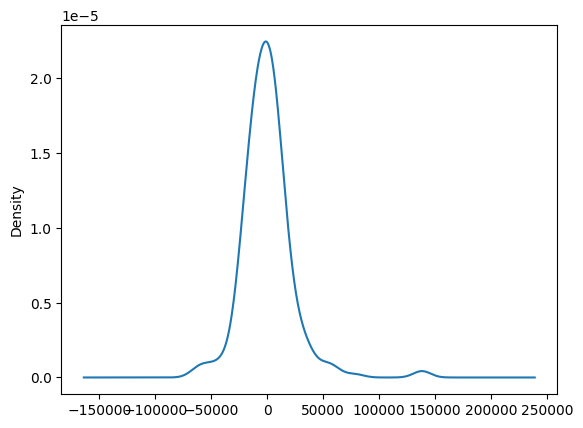

In [965]:
model_fit.resid.plot(kind='kde')

## **Calculating MAE, MSE, RMSE**

In [966]:
# Calculate error metrics
actual = df['quantity'][start_date:end_date]
forecast = df['forecast'][start_date:end_date]

SARIMAX_Qty_mae = mean_absolute_error(actual, forecast)
SARIMAX_Qty_mse = mean_squared_error(actual, forecast)
SARIMAX_Qty_rmse = np.sqrt(SARIMAX_Qty_mse)

print(f'SARIMAX_Qty_MAE: {SARIMAX_Qty_mae}')
print(f'SARIMAX_Qty_MSE: {SARIMAX_Qty_mse}')
print(f'SARIMAX_Qty_RMSE: {SARIMAX_Qty_rmse}')

SARIMAX_Qty_MAE: 11753.369779947783
SARIMAX_Qty_MSE: 203379011.72280535
SARIMAX_Qty_RMSE: 14261.101350274646


In [967]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [968]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [969]:
print(future_datest_df.index[0])
future_datest_df.index[-1]

2016-03-01 00:00:00


Timestamp('2018-01-01 00:00:00')

In [970]:
future_datest_df.tail()

,quantity,median_price,forecast
2017-09-01,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN
2017-12-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN


In [971]:
future_df=pd.concat([df,future_datest_df])

In [972]:
future_df['forecast'] = results.predict(start = datetime.datetime(2016,3,1), end = datetime.datetime(2018,1,1), dynamic= True)
fig1 = px.line(future_df, y=['quantity', 'forecast'], labels={'value': 'Values', 'variable': 'Legend'},
               title='Quantity vs Forecast')
fig1.update_layout(width=800, height=400)
fig1.show()


## **PROPHET model for Quantity**

In [973]:
#pip install prophet

In [974]:
#conda update -n base -c defaults conda

In [975]:
from prophet import Prophet

In [976]:
#Initializing model
model=Prophet()
model

In [977]:
df.drop('forecast',axis=1,inplace=True)

In [978]:
df= df.reset_index()

In [979]:
df.head()

,date,quantity,median_price
0,1996-01-01,225063.0,226.0
1,1996-02-01,196164.0,186.0
2,1996-03-01,178992.0,243.0
3,1996-04-01,192592.0,254.0
4,1996-05-01,237574.0,269.0


In [980]:
df=pd.DataFrame(df[['date','quantity']])

In [981]:
df.head()

,date,quantity
0,1996-01-01,225063.0
1,1996-02-01,196164.0
2,1996-03-01,178992.0
3,1996-04-01,192592.0
4,1996-05-01,237574.0


In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      242 non-null    datetime64[ns]
 1   quantity  242 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [983]:
df['date']=df['date'].astype(str)

<Axes: >

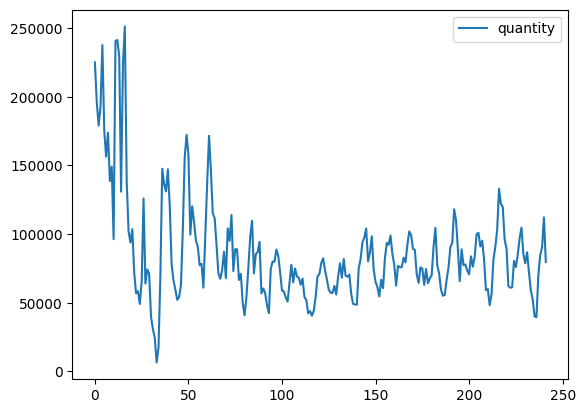

In [984]:
df[['date','quantity']].plot()

In [985]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1996-01-01,225063.0
1,1996-02-01,196164.0
2,1996-03-01,178992.0
3,1996-04-01,192592.0
4,1996-05-01,237574.0


In [986]:
df.tail()

,ds,y
237,2015-10-01,69684.900000
238,2015-11-01,84584.707865
239,2015-12-01,90368.806452
240,2016-01-01,112143.650602
241,2016-02-01,79671.049383


In [987]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1996-01-01,225063.0
1,1996-02-01,196164.0
2,1996-03-01,178992.0
3,1996-04-01,192592.0
4,1996-05-01,237574.0


In [988]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      242 non-null    datetime64[ns]
 1   y       242 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [989]:
df.columns

Index(['ds', 'y'], dtype='object')

In [990]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/mzf_xc9p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/y2_8up25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43180', 'data', 'file=/tmp/tmpp3z4y689/mzf_xc9p.json', 'init=/tmp/tmpp3z4y689/y2_8up25.json', 'output', 'file=/tmp/tmpp3z4y689/prophet_modeluohdvdfl/prophet_model-20240530122153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [991]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [992]:
df.tail()

,ds,y
237,2015-10-01,69684.900000
238,2015-11-01,84584.707865
239,2015-12-01,90368.806452
240,2016-01-01,112143.650602
241,2016-02-01,79671.049383


In [993]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [994]:
future_dates.tail()

,ds
602,2017-01-27
603,2017-01-28
604,2017-01-29
605,2017-01-30
606,2017-01-31


In [995]:
prediction=model.predict(future_dates)

In [996]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-01,139990.519816,132621.357094,197526.714606,139990.519816,139990.519816,26007.121425,26007.121425,26007.121425,26007.121425,26007.121425,26007.121425,0.0,0.0,0.0,165997.641241
1,1996-02-01,139199.524330,128150.957321,198554.206570,139199.524330,139199.524330,24290.096581,24290.096581,24290.096581,24290.096581,24290.096581,24290.096581,0.0,0.0,0.0,163489.620911
2,1996-03-01,138459.560811,120840.177948,189903.564241,138459.560811,138459.560811,16653.142091,16653.142091,16653.142091,16653.142091,16653.142091,16653.142091,0.0,0.0,0.0,155112.702902
3,1996-04-01,137668.565325,112153.247005,184782.435005,137668.565325,137668.565325,10300.868574,10300.868574,10300.868574,10300.868574,10300.868574,10300.868574,0.0,0.0,0.0,147969.433900
4,1996-05-01,136903.085823,115979.752660,185029.301810,136903.085823,136903.085823,13531.555439,13531.555439,13531.555439,13531.555439,13531.555439,13531.555439,0.0,0.0,0.0,150434.641263


## **Calculating MAE, MSE, RMSE**

In [997]:
# Add forecast to the original dataframe
df['prediction'] = prediction['yhat'].iloc[:len(df)]

# Define start and end dates for error metrics calculation
start_date = '2012-12-01'
end_date = '2016-02-01'

# Filter actual and forecasted values
actual = df.loc[(df['ds'] >= start_date) & (df['ds'] <= end_date), 'y']
forecasted = df.loc[(df['ds'] >= start_date) & (df['ds'] <= end_date), 'prediction']

# Calculate error metrics
Prophet_Qty_mae = mean_absolute_error(actual, forecasted)
Prophet_Qty_mse = mean_squared_error(actual, forecasted)
Prophet_Qty_rmse = np.sqrt(Prophet_Qty_mse)

print(f'Prophet_Qty_MAE: {Prophet_Qty_mae}')
print(f'Prophet_Qty_MSE: {Prophet_Qty_mse}')
print(f'Prophet_Qty_RMSE: {Prophet_Qty_rmse}')

Prophet_Qty_MAE: 11432.407342700437
Prophet_Qty_MSE: 199122076.2316043
Prophet_Qty_RMSE: 14111.062193598478


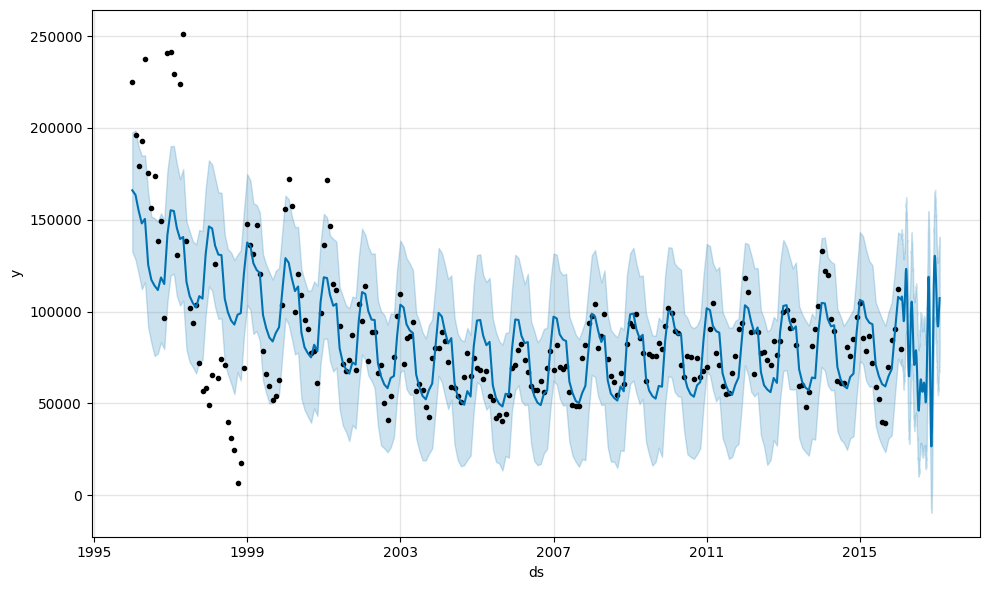

In [998]:
### plot the predicted projection
model.plot(prediction);

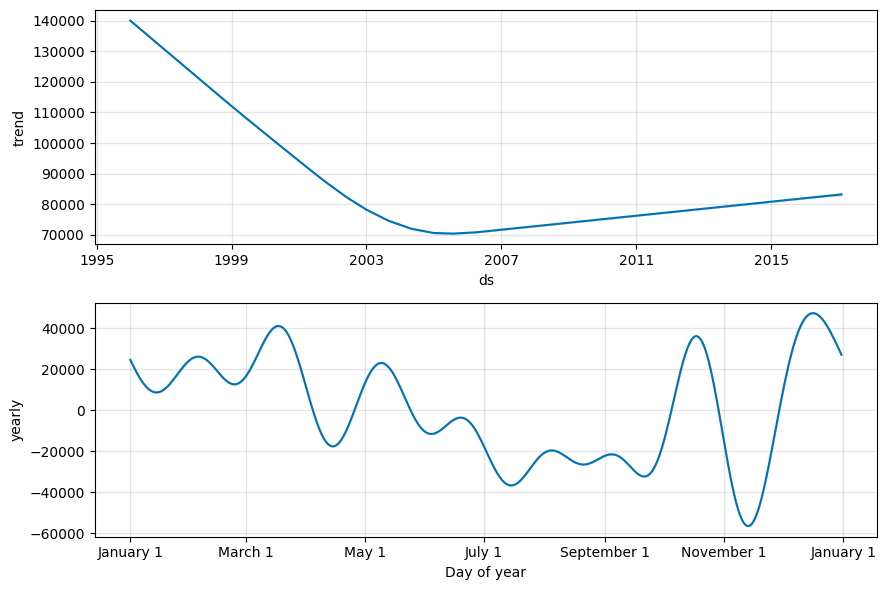

In [999]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction);

## **Cross validation through prophet model**

In [1000]:
from prophet.diagnostics import cross_validation

In [1001]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 35 forecasts with cutoffs between 1998-05-01 00:00:00 and 2015-02-01 00:00:00


  0%|          | 0/35 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/fhbbpns1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/oyyjmwlg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17499', 'data', 'file=/tmp/tmpp3z4y689/fhbbpns1.json', 'init=/tmp/tmpp3z4y689/oyyjmwlg.json', 'output', 'file=/tmp/tmpp3z4y689/prophet_modelhhl5f2mf/prophet_model-20240530122157.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:21:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/0zl7h2zg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/73otwcni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

In [1002]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-06-01,19206.131541,-18829.669608,54267.189094,71028.888889,1998-05-01
1,1998-07-01,-29803.764530,-63262.175918,6249.818034,39771.888889,1998-05-01
2,1998-08-01,-41124.210618,-75856.980118,-5026.648592,30891.222222,1998-05-01
3,1998-09-01,38672.282910,5422.843667,71884.291444,24575.000000,1998-05-01
4,1998-10-01,-788.197140,-36331.087665,34741.472913,6526.800000,1998-05-01


In [1003]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)


In [1004]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,1.572612e+09,39656.178481,30333.392501,0.458452,0.283280,0.580525,0.690476
1,37 days,1.553550e+09,39415.095854,30048.370229,0.458139,0.283280,0.573437,0.714286
2,38 days,1.555383e+09,39438.337963,30193.118703,0.460066,0.283280,0.575178,0.714286
3,39 days,1.899193e+09,43579.735304,32976.080962,0.486695,0.313238,0.621806,0.690476
4,41 days,1.731796e+09,41614.855995,31476.363129,0.429898,0.308960,0.597105,0.738095


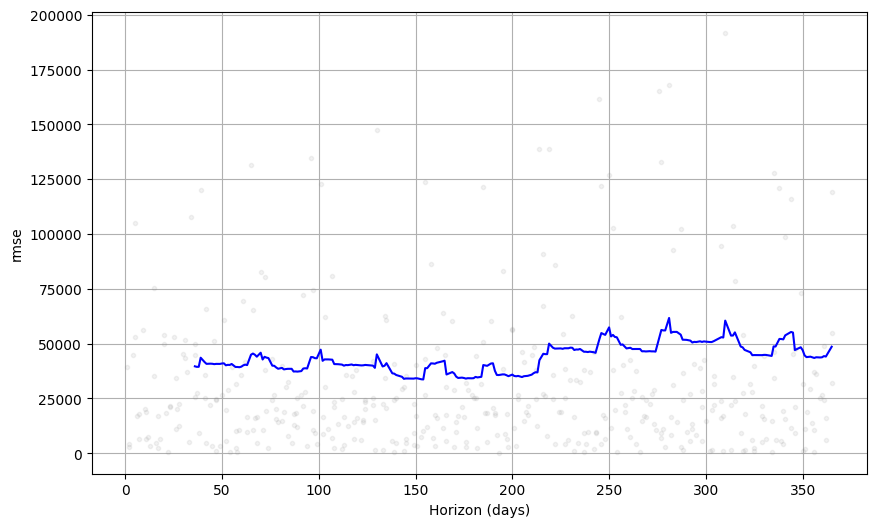

In [1005]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

## **LSTM Model on Quantity**

In [1006]:
df=pd.read_csv('/content/drive/MyDrive/MarketPricePrediction.csv')

In [1007]:
#Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,2011-12-01
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,2012-12-01
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,2013-12-01
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,2014-12-01
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,2015-12-01


In [1008]:
df.set_index('date', inplace=True)
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [1009]:
df1=df.reset_index()['quantity']

In [1010]:
df1

0          2350
1           900
2           790
3           245
4          1035
          ...  
10222    131326
10223    207066
10224    215883
10225    201077
10226    223315
Name: quantity, Length: 10227, dtype: int64

In [1011]:
# Remove duplicate indices by aggregating data (Taking mean for repeated dates)
df1 = df1.groupby(df.index).mean()

# If the index is not in datetime format, convert it
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df1.index = pd.to_datetime(df1.index)

In [1012]:
df1

date
1996-01-01    225063.000000
1996-02-01    196164.000000
1996-03-01    178992.000000
1996-04-01    192592.000000
1996-05-01    237574.000000
                  ...      
2015-10-01     69684.900000
2015-11-01     84584.707865
2015-12-01     90368.806452
2016-01-01    112143.650602
2016-02-01     79671.049383
Name: quantity, Length: 242, dtype: float64

In [1013]:
df1.tail()

date
2015-10-01     69684.900000
2015-11-01     84584.707865
2015-12-01     90368.806452
2016-01-01    112143.650602
2016-02-01     79671.049383
Name: quantity, dtype: float64

In [1014]:
df1.shape

(242,)

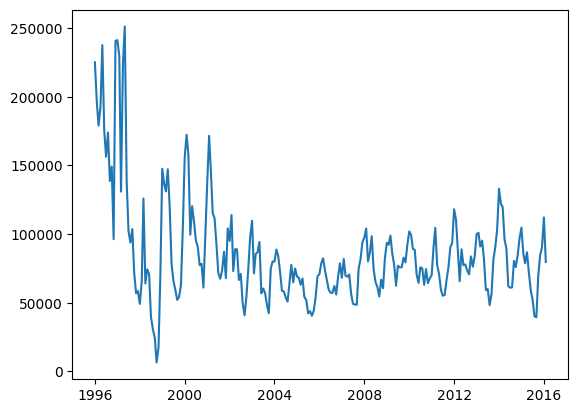

In [1015]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [1016]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [1017]:
import numpy as np

In [1018]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [1019]:
print(df1)

[[0.89342418]
 [0.77527869]
 [0.70507577]
 [0.76067557]
 [0.94457191]
 [0.69001477]
 [0.61223228]
 [0.68422585]
 [0.5401406 ]
 [0.58292383]
 [0.3669922 ]
 [0.95700418]
 [0.959498  ]
 [0.91176802]
 [0.50840375]
 [0.88747582]
 [1.        ]
 [0.53821914]
 [0.39040135]
 [0.35692863]
 [0.39687709]
 [0.26755441]
 [0.20587461]
 [0.21254025]
 [0.17432721]
 [0.2403473 ]
 [0.48799489]
 [0.23505183]
 [0.27697612]
 [0.26369876]
 [0.13591325]
 [0.09960713]
 [0.07378502]
 [0.        ]
 [0.04392977]
 [0.25751578]
 [0.57671973]
 [0.53123423]
 [0.50924183]
 [0.57508783]
 [0.46678715]
 [0.29327504]
 [0.2439155 ]
 [0.21705794]
 [0.18634273]
 [0.19449341]
 [0.23071627]
 [0.39729297]
 [0.61100433]
 [0.67743048]
 [0.61760941]
 [0.38036811]
 [0.46505634]
 [0.41842774]
 [0.36272982]
 [0.34437862]
 [0.28959074]
 [0.29371698]
 [0.22273525]
 [0.3782254 ]
 [0.53125199]
 [0.6744366 ]
 [0.57317179]
 [0.44451222]
 [0.42942464]
 [0.35101952]
 [0.26569631]
 [0.24922528]
 [0.27393389]
 [0.3293999 ]
 [0.25113166]
 [0.39

In [1020]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [1021]:
training_size,test_size

(193, 49)

In [1022]:
train_data

array([[0.89342418],
       [0.77527869],
       [0.70507577],
       [0.76067557],
       [0.94457191],
       [0.69001477],
       [0.61223228],
       [0.68422585],
       [0.5401406 ],
       [0.58292383],
       [0.3669922 ],
       [0.95700418],
       [0.959498  ],
       [0.91176802],
       [0.50840375],
       [0.88747582],
       [1.        ],
       [0.53821914],
       [0.39040135],
       [0.35692863],
       [0.39687709],
       [0.26755441],
       [0.20587461],
       [0.21254025],
       [0.17432721],
       [0.2403473 ],
       [0.48799489],
       [0.23505183],
       [0.27697612],
       [0.26369876],
       [0.13591325],
       [0.09960713],
       [0.07378502],
       [0.        ],
       [0.04392977],
       [0.25751578],
       [0.57671973],
       [0.53123423],
       [0.50924183],
       [0.57508783],
       [0.46678715],
       [0.29327504],
       [0.2439155 ],
       [0.21705794],
       [0.18634273],
       [0.19449341],
       [0.23071627],
       [0.397

In [1023]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [1024]:
# reshape into X=t,t+1,t+2,t+3,t+4 and Y=t+5
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [1025]:
print(X_train.shape), print(y_train.shape)

(187, 5)
(187,)


(None, None)

In [1026]:
print(X_test.shape), print(ytest.shape)

(43, 5)
(43,)


(None, None)

In [1027]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [1028]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [1029]:
# Define the learning rate
learning_rate = 0.001  # You can adjust this value as needed

# Create the optimizer with the custom learning rate
optimizer = Adam(learning_rate=learning_rate)

In [1030]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(5, 1)))
model.add(Dropout(0.2))  # Add dropout layer with 20% dropout rate
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [1031]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 5, 50)             10400     
                                                                 
 dropout_10 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_33 (LSTM)              (None, 5, 50)             20200     
                                                                 
 dropout_11 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_34 (LSTM)              (None, 50)                20200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 508

In [1032]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=500,batch_size=64,verbose=1)

Epoch 1/500
3/3 [==============================] - 9s 628ms/step - loss: 0.1220 - val_loss: 0.0804
Epoch 2/500
3/3 [==============================] - 0s 40ms/step - loss: 0.0985 - val_loss: 0.0595
Epoch 3/500
3/3 [==============================] - 0s 32ms/step - loss: 0.0748 - val_loss: 0.0379
Epoch 4/500
3/3 [==============================] - 0s 31ms/step - loss: 0.0510 - val_loss: 0.0183
Epoch 5/500
3/3 [==============================] - 0s 34ms/step - loss: 0.0301 - val_loss: 0.0081
Epoch 6/500
3/3 [==============================] - 0s 31ms/step - loss: 0.0215 - val_loss: 0.0160
Epoch 7/500
3/3 [==============================] - 0s 33ms/step - loss: 0.0289 - val_loss: 0.0201
Epoch 8/500
3/3 [==============================] - 0s 40ms/step - loss: 0.0284 - val_loss: 0.0128
Epoch 9/500
3/3 [==============================] - 0s 32ms/step - loss: 0.0231 - val_loss: 0.0084
Epoch 10/500
3/3 [==============================] - 0s 34ms/step - loss: 0.0210 - val_loss: 0.0081
Epoch 11/500
3/3 [

In [1033]:
## Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


2/2 [==============================] - 0s 13ms/step


In [1034]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## **Calculate MAE,MSE,RMSE**

In [1035]:
# Calculate error metrics for the test set
LSTM_Qty_mae = mean_absolute_error(ytest, test_predict)
LSTM_Qty_mse = mean_squared_error(ytest, test_predict)
LSTM_Qty_rmse = np.sqrt(LSTM_Qty_mse)

print(f'LSTM_Qty_MAE: {LSTM_Qty_mae}')
print(f'LSTM_Qty_MSE: {LSTM_Qty_mse}')
print(f'LSTM_Qty_RMSE: {LSTM_Qty_rmse}')

LSTM_Qty_MAE: 76780.39548011374
LSTM_Qty_MSE: 6179510241.634428
LSTM_Qty_RMSE: 78609.86096943836


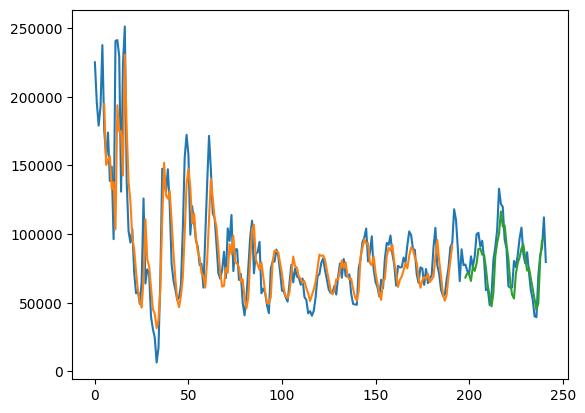

In [1036]:
### Plotting
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [1037]:
len(test_data)

49

In [1038]:
x_input=test_data[44:].reshape(1,-1)
x_input.shape

(1, 5)

In [1039]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [1040]:
temp_input

[0.25820424095644734,
 0.31911794134044796,
 0.34276461191999563,
 0.43178497678058214,
 0.2990298218628061]

In [1041]:
# demonstrate prediction for next 30 Months
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<30):

    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.30845478]
6
1 day input [0.31911794 0.34276461 0.43178498 0.29902982 0.30845478]
1 day output [[0.28003752]]
2 day input [0.34276461 0.43178498 0.29902982 0.30845478 0.28003752]
2 day output [[0.24808705]]
3 day input [0.43178498 0.29902982 0.30845478 0.28003752 0.24808705]
3 day output [[0.22432984]]
4 day input [0.29902982 0.30845478 0.28003752 0.24808705 0.22432984]
4 day output [[0.21831301]]
5 day input [0.30845478 0.28003752 0.24808705 0.22432984 0.21831301]
5 day output [[0.21030985]]
6 day input [0.28003752 0.24808705 0.22432984 0.21831301 0.21030985]
6 day output [[0.21602648]]
7 day input [0.24808705 0.22432984 0.21831301 0.21030985 0.21602648]
7 day output [[0.23478463]]
8 day input [0.22432984 0.21831301 0.21030985 0.21602648 0.23478463]
8 day output [[0.25752854]]
9 day input [0.21831301 0.21030985 0.21602648 0.23478463 0.25752854]
9 day output [[0.2805417]]
10 day input [0.21030985 0.21602648 0.23478463 0.25752854 0.28054169]
10 day output [[0.29557458]]
11 day input [

In [1042]:
day_new=np.arange(1,6)
day_pred=np.arange(6,36)

In [1043]:
len(df1)

242

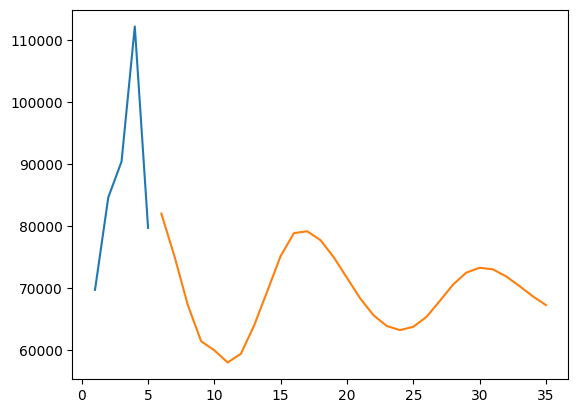

In [1044]:
#Forecasting for next 30 months
plt.plot(day_new,scaler.inverse_transform(df1[237:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

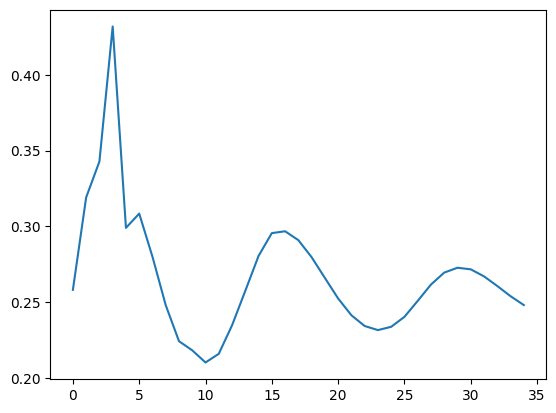

In [1045]:
#extending the line from the previous months
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[237:])

In [1046]:
# Complete plot including forecasting of 30 months
df3=scaler.inverse_transform(df3).tolist()

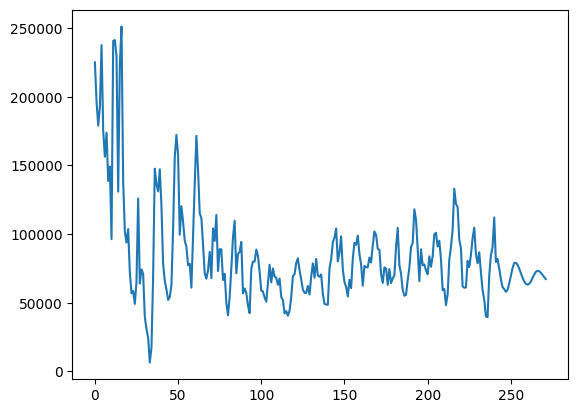

In [1047]:
plt.plot(df3)

In [1048]:
# prompt: convert df3 to dataframe

import pandas as pd
df3 = pd.DataFrame(df3, columns=['quantity'])


In [1049]:
df3.tail()

,quantity
267,72988.983939
268,71852.481777
269,70297.318938
270,68655.203328
271,67227.345964


-------------------------------------------------------------------------------
# **Forecasting For Price**
-------------------------------------------------------------------------------


### **Data Preprocessing**

In [1050]:
df=pd.read_csv('/content/drive/MyDrive/MarketPricePrediction.csv')

In [1051]:
df.columns=df.columns.str.lower()

In [1052]:
df.columns

Index(['market', 'month', 'year', 'quantity', 'pricemin', 'pricemax',
       'pricemod', 'state', 'city', 'date'],
      dtype='object')

In [1053]:
df['median_price']=df[['pricemin', 'pricemax','pricemod']].median(  axis=1)

In [1054]:
df['date']=pd.to_datetime(df['date'])

In [1055]:
df.set_index('date', inplace=True)

In [1056]:
# Sort the data by date
df.sort_index(inplace=True)
df.head()

,market,month,year,quantity,pricemin,pricemax,pricemod,state,city,median_price
date,,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,226.0
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,186.0
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,243.0
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,254.0
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,269.0


In [1057]:
df.drop(['market', 'month', 'year', 'quantity', 'pricemin', 'pricemax','pricemod', 'state', 'city'],axis=1,inplace=True)

In [1058]:
df

,median_price
date,
1996-01-01,226.0
1996-02-01,186.0
1996-03-01,243.0
1996-04-01,254.0
1996-05-01,269.0
...,...
2016-02-01,1077.0
2016-02-01,575.0
2016-02-01,730.0


In [1059]:
# Remove duplicate indices by aggregating data (e.g., take mean for repeated dates)
df = df.groupby(df.index).mean()

# If the index is not in datetime format, convert it
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df.index = pd.to_datetime(df.index)

In [1060]:
df

,median_price
date,
1996-01-01,226.000000
1996-02-01,186.000000
1996-03-01,243.000000
1996-04-01,254.000000
1996-05-01,269.000000
...,...
2015-10-01,2838.788889
2015-11-01,2101.056180
2015-12-01,1427.516129


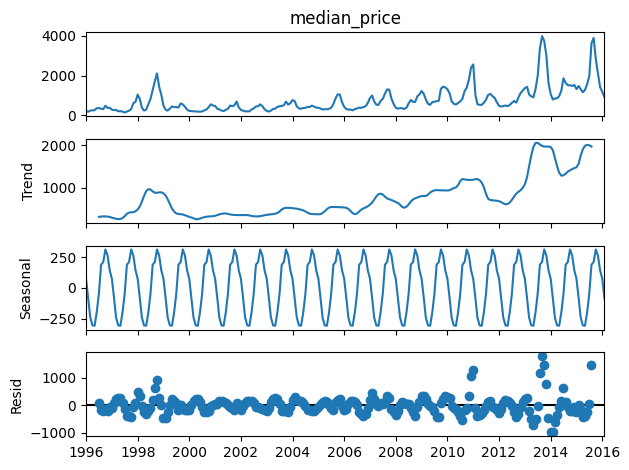

In [1061]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data= seasonal_decompose(df['median_price'],model='additive')
decompose_data.plot();

## **Testing For Stationarity**

In [1062]:
test_result=adfuller(df['median_price'])

In [1063]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(median_price):
    result=adfuller(median_price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [1064]:
adfuller_test(df['median_price'])

ADF Test Statistic : -1.5529565759212154
p-value : 0.5071710159736902
#Lags Used : 13
Number of Observations Used : 228
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [1065]:
## Use Techniques Differencing
df['median_price First Difference']=df['median_price']-df['median_price'].shift(1)

In [1066]:
df.head()

,median_price,median_price First Difference
date,,
1996-01-01,226.0,NaN
1996-02-01,186.0,-40.0
1996-03-01,243.0,57.0
1996-04-01,254.0,11.0
1996-05-01,269.0,15.0


In [1067]:
adfuller_test(df['median_price First Difference'].dropna())

ADF Test Statistic : -5.28728699416396
p-value : 5.817627863234602e-06
#Lags Used : 12
Number of Observations Used : 228
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='date'>

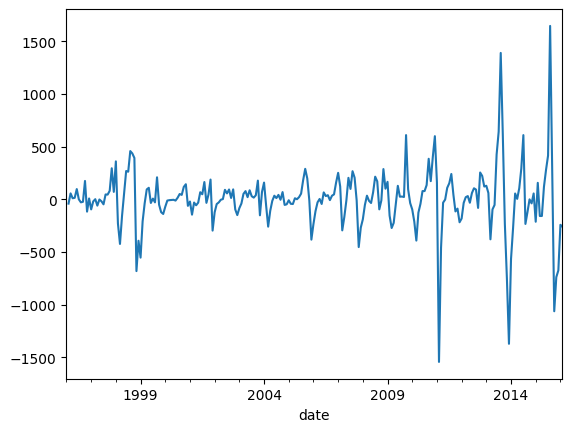

In [1068]:
df['median_price First Difference'].plot()

In [1069]:
## Use Techniques Differencing for period=12
df['median_price 12 Difference']=df['median_price']-df['median_price'].shift(12)

In [1070]:
df.head(13)

,median_price,median_price First Difference,median_price 12 Difference
date,,,
1996-01-01,226.0,NaN,NaN
1996-02-01,186.0,-40.0,NaN
1996-03-01,243.0,57.0,NaN
1996-04-01,254.0,11.0,NaN
1996-05-01,269.0,15.0,NaN
1996-06-01,367.0,98.0,NaN
1996-07-01,368.0,1.0,NaN
1996-08-01,340.0,-28.0,NaN
1996-09-01,317.0,-23.0,NaN


In [1071]:
adfuller_test(df['median_price 12 Difference'].dropna())

ADF Test Statistic : -5.184876242816724
p-value : 9.43915517882745e-06
#Lags Used : 13
Number of Observations Used : 216
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## **Plotting ACF and PACF graphs for Price**

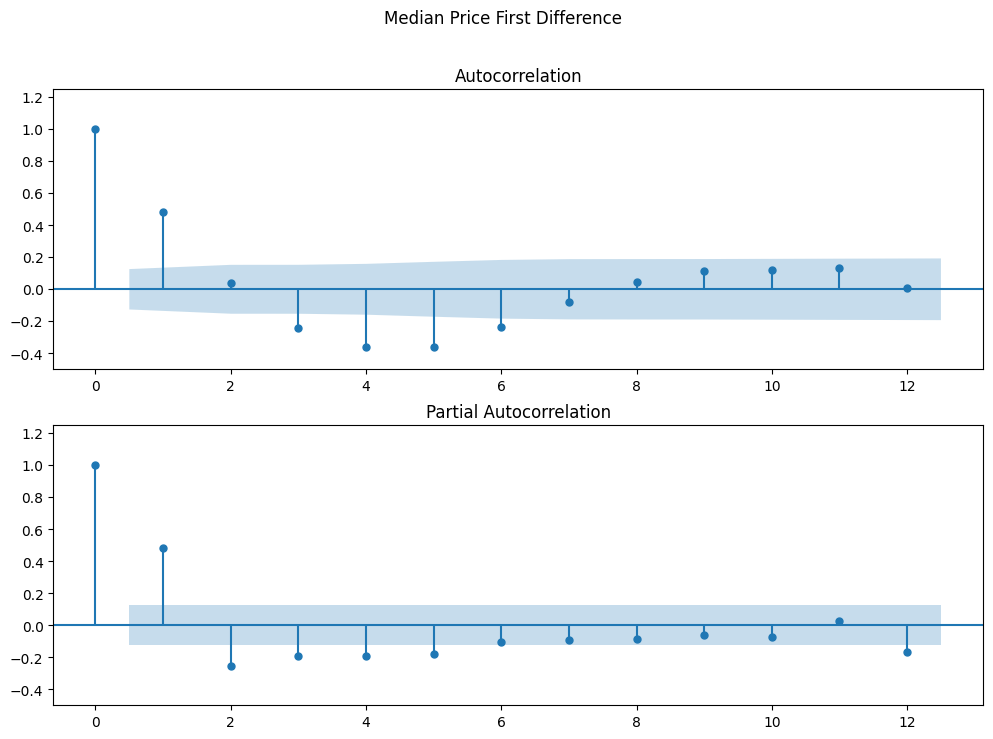

In [1072]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Median Price First Difference')
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['median_price First Difference'].dropna(),lags=12,ax=ax1)
ax1.set_ylim(-0.50, 1.25);
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['median_price First Difference'].dropna(),lags=12,ax=ax2)
ax2.set_ylim(-0.50, 1.25);

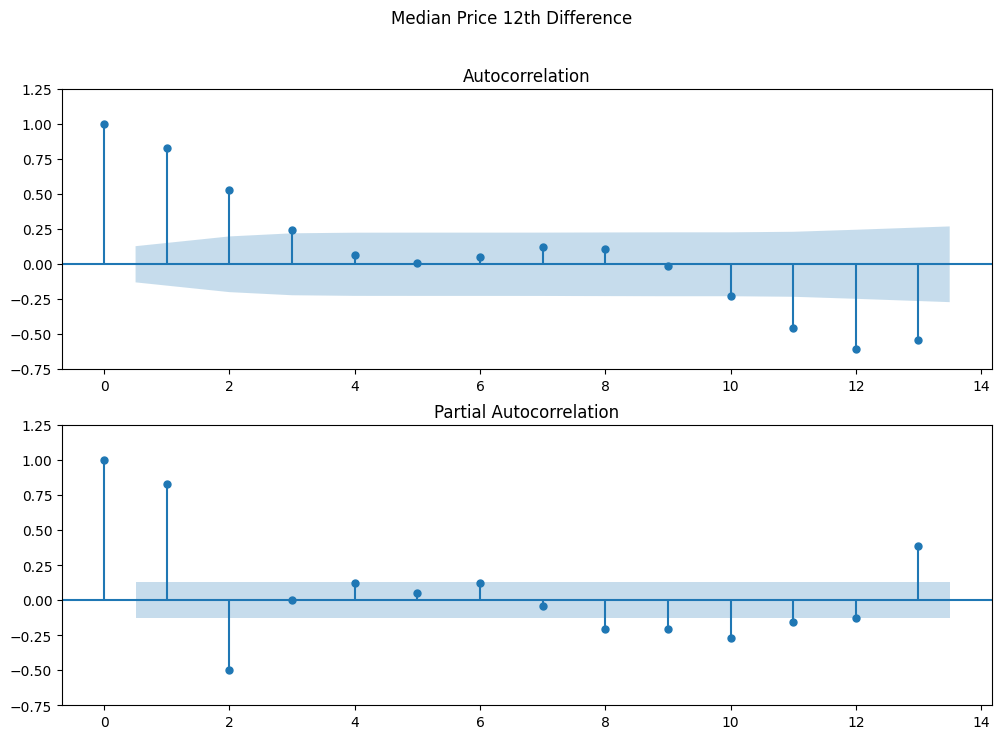

In [1073]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Median Price 12th Difference')
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['median_price 12 Difference'].dropna(),lags=13,ax=ax1)
ax1.set_ylim(-0.75, 1.25);
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['median_price 12 Difference'].dropna(),lags=13,ax=ax2)
ax2.set_ylim(-0.75, 1.25);

# **ARIMA model for Price**

In [1074]:
# For non-seasonal data
#p=9, d=1, q=0

model=ARIMA(df['median_price'],order=(9,1,0))
model_fit=model.fit()

In [1075]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           median_price   No. Observations:                  242
Model:                 ARIMA(9, 1, 0)   Log Likelihood               -1651.289
Date:                Thu, 30 May 2024   AIC                           3322.579
Time:                        12:23:49   BIC                           3357.427
Sample:                    01-01-1996   HQIC                          3336.618
                         - 02-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4170      0.048      8.693      0.000       0.323       0.511
ar.L2         -0.2212      0.051     -4.377      0.000      -0.320      -0.122
ar.L3         -0.1720      0.085     -2.027      0.043      -0.338      -0.006
ar.L4         -0.1623      0.070     -2.333      0.020      -0.299      -0.026
ar.L5         -0.1896      0.090     -2.102      0.036      -0.366      -0.013
ar.L6         -0.1236      0.086     -1.435      0.151      -0.293       0.045
ar.L7         -0.0723      0.090     -0.803      0.422      -0.249       0.104
ar.L8         -0.0621      0.073     -0.846      0.398      -0.206       0.082
ar.L9         -0.0748      0.094     -0.798      0.425      -0.259       0.109
sigma2      5.209e+04   2664.215     19.553      0.000    4.69e+04    5.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1905.72
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               5.23   Skew:                             0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1076]:
# Generate forecast
start_date = datetime.datetime(2012, 12, 1)
end_date = datetime.datetime(2016, 2, 1)
forecasted_date= datetime.datetime(2017, 2, 1)

In [1077]:
df['forecast']=model_fit.predict(start=start_date,end=end_date,dynamic=True)

fig = px.line(df, y=['median_price', 'forecast'], labels={'value': 'Values', 'variable': 'Legend'}, title='median_price vs Forecast')
fig.update_layout(width=800, height=400)
fig.show()

In [1078]:
# Calculate error metrics
actual = df['median_price'][start_date:end_date]
forecast = df['forecast'][start_date:end_date]

ARIMA_price_mae = mean_absolute_error(actual, forecast)
ARIMA_price_mse = mean_squared_error(actual, forecast)
ARIMA_price_rmse = np.sqrt(ARIMA_price_mse)

print(f'ARIMA_price_MAE: {ARIMA_price_mae}')
print(f'ARIMA_price_MSE: {ARIMA_price_mse}')
print(f'ARIMA_price_RMSE: {ARIMA_price_rmse}')

ARIMA_price_MAE: 899.8626804617461
ARIMA_price_MSE: 1582561.8574288574
ARIMA_price_RMSE: 1257.9991484213563


# **SARIMAX Model for Price**

In [1079]:
# for seasonal data
# p=2 ,d=1 ,q=3
model=sm.tsa.statespace.SARIMAX(df['median_price'],order=(2,1,3),seasonal_order=(2,1,3,12))
results=model.fit()

In [1080]:
df['forecast']=results.predict(start=start_date,end=end_date,dynamic=True)

fig = px.line(df, y=['median_price', 'forecast'], labels={'value': 'Values', 'variable': 'Legend'}, title='median_price vs Forecast')
fig.update_layout(width=800, height=400)
fig.show()

In [1081]:
# Calculate error metrics
actual = df['median_price'][start_date:end_date]
forecast = df['forecast'][start_date:end_date]

SARIMAX_price_mae = mean_absolute_error(actual, forecast)
SARIMAX_price_mse = mean_squared_error(actual, forecast)
SARIMAX_price_rmse = np.sqrt(SARIMAX_price_mse)

print(f'SARIMAX_price_MAE: {SARIMAX_price_mae}')
print(f'SARIMAX_price_MSE: {SARIMAX_price_mse}')
print(f'SARIMAX_price_RMSE: {SARIMAX_price_rmse}')

SARIMAX_price_MAE: 890.3167866259508
SARIMAX_price_MSE: 1555605.8207442826
SARIMAX_price_RMSE: 1247.2392796670101


# **PROPHET Model  for Price**

In [1082]:
#Initializing model

model=Prophet()
model

In [1083]:
df.columns

Index(['median_price', 'median_price First Difference',
       'median_price 12 Difference', 'forecast'],
      dtype='object')

In [1084]:
df.drop(['median_price First Difference','median_price 12 Difference', 'forecast'],axis=1,inplace=True)

In [1085]:
df= df.reset_index()

In [1086]:
df.head()

,date,median_price
0,1996-01-01,226.0
1,1996-02-01,186.0
2,1996-03-01,243.0
3,1996-04-01,254.0
4,1996-05-01,269.0


In [1087]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          242 non-null    datetime64[ns]
 1   median_price  242 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [1088]:
df['date']=df['date'].astype(str)

<Axes: >

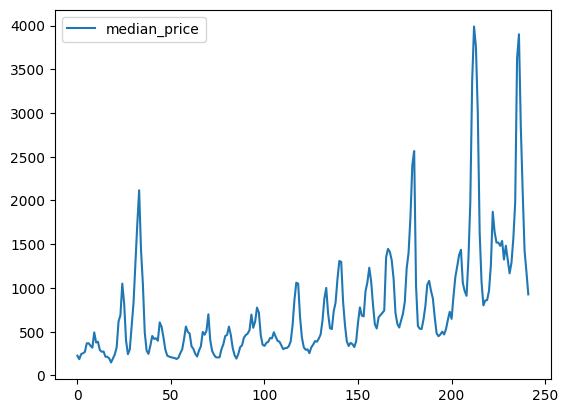

In [1089]:
df[['date','median_price']].plot()

In [1090]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1996-01-01,226.0
1,1996-02-01,186.0
2,1996-03-01,243.0
3,1996-04-01,254.0
4,1996-05-01,269.0


In [1091]:
df.tail()

,ds,y
237,2015-10-01,2838.788889
238,2015-11-01,2101.056180
239,2015-12-01,1427.516129
240,2016-01-01,1186.457831
241,2016-02-01,926.345679


In [1092]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1996-01-01,226.0
1,1996-02-01,186.0
2,1996-03-01,243.0
3,1996-04-01,254.0
4,1996-05-01,269.0


In [1093]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      242 non-null    datetime64[ns]
 1   y       242 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [1094]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/c2es0odo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/46jrzx14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94500', 'data', 'file=/tmp/tmpp3z4y689/c2es0odo.json', 'init=/tmp/tmpp3z4y689/46jrzx14.json', 'output', 'file=/tmp/tmpp3z4y689/prophet_modela8rfq4zo/prophet_model-20240530122413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [1095]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [1096]:
df.tail()

,ds,y
237,2015-10-01,2838.788889
238,2015-11-01,2101.056180
239,2015-12-01,1427.516129
240,2016-01-01,1186.457831
241,2016-02-01,926.345679


In [1097]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [1098]:
future_dates.tail()

,ds
602,2017-01-27
603,2017-01-28
604,2017-01-29
605,2017-01-30
606,2017-01-31


In [1099]:
prediction=model.predict(future_dates)

In [1100]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-01,363.453150,-185.200577,963.669203,363.453150,363.453150,12.495211,12.495211,12.495211,12.495211,12.495211,12.495211,0.0,0.0,0.0,375.948361
1,1996-02-01,364.750163,-332.449478,802.563454,364.750163,364.750163,-142.954126,-142.954126,-142.954126,-142.954126,-142.954126,-142.954126,0.0,0.0,0.0,221.796037
2,1996-03-01,365.963498,-411.090666,704.558989,365.963498,365.963498,-271.496992,-271.496992,-271.496992,-271.496992,-271.496992,-271.496992,0.0,0.0,0.0,94.466506
3,1996-04-01,367.260511,-517.391644,626.137261,367.260511,367.260511,-298.463934,-298.463934,-298.463934,-298.463934,-298.463934,-298.463934,0.0,0.0,0.0,68.796577
4,1996-05-01,368.515685,-482.045718,673.041692,368.515685,368.515685,-276.826175,-276.826175,-276.826175,-276.826175,-276.826175,-276.826175,0.0,0.0,0.0,91.689510


In [1101]:
# Add forecast to the original dataframe
df['prediction'] = prediction['yhat'].iloc[:len(df)]

# Define start and end dates for error metrics calculation
start_date = '2012-12-01'
end_date = '2016-02-01'

# Filter actual and forecasted values
actual = df.loc[(df['ds'] >= start_date) & (df['ds'] <= end_date), 'y']
forecasted = df.loc[(df['ds'] >= start_date) & (df['ds'] <= end_date), 'prediction']

# Calculate error metrics
Prophet_price_mae = mean_absolute_error(actual, forecasted)
Prophet_price_mse = mean_squared_error(actual, forecasted)
Prophet_price_rmse = np.sqrt(Prophet_price_mse)

print(f'Prophet_price_MAE: {Prophet_price_mae}')
print(f'Prophet_price_MSE: {Prophet_price_mse}')
print(f'Prophet_price_RMSE: {Prophet_price_rmse}')

Prophet_price_MAE: 508.81715995993176
Prophet_price_MSE: 635490.9253549961
Prophet_price_RMSE: 797.1768469762504


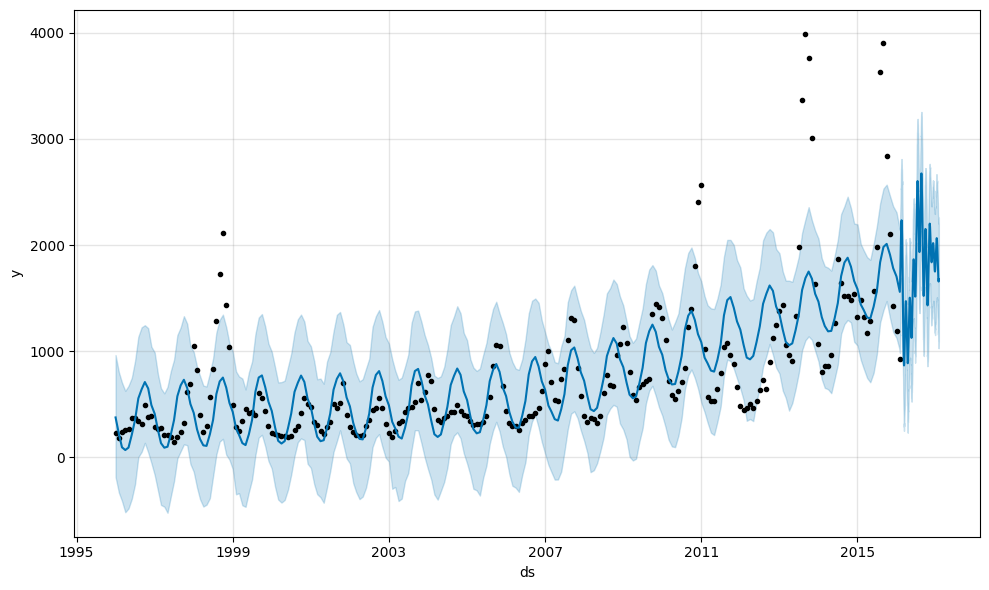

In [1102]:
### plot the predicted projection
model.plot(prediction);

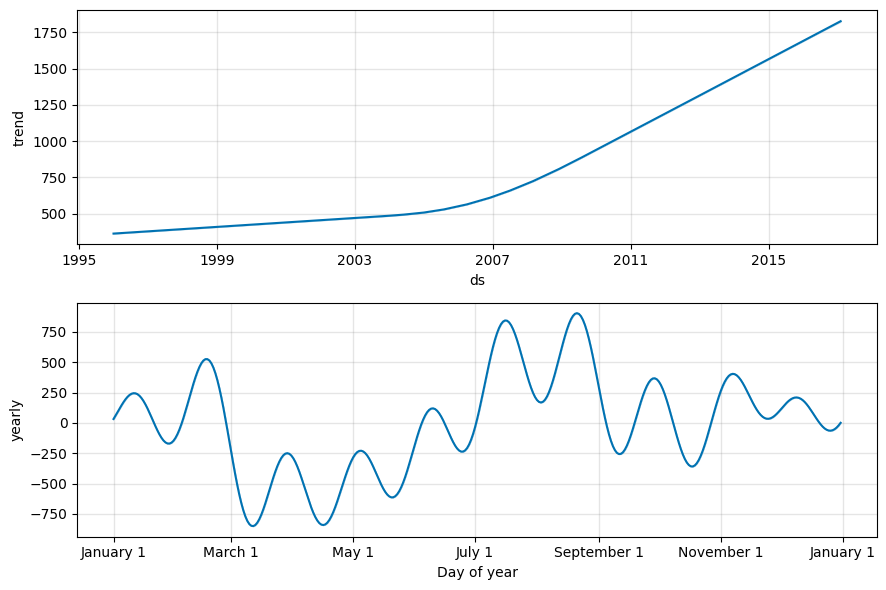

In [1103]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction);

# **Cross Validation using PROPHET**

In [1104]:
from prophet.diagnostics import cross_validation

In [1105]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 35 forecasts with cutoffs between 1998-05-01 00:00:00 and 2015-02-01 00:00:00


  0%|          | 0/35 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/50wzpcsq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/bbrf_238.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19038', 'data', 'file=/tmp/tmpp3z4y689/50wzpcsq.json', 'init=/tmp/tmpp3z4y689/bbrf_238.json', 'output', 'file=/tmp/tmpp3z4y689/prophet_modelyp9jfask/prophet_model-20240530122415.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:24:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/_fzjcj5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3z4y689/p9fk9tyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

In [1106]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-06-01,569.859729,380.853548,750.400245,566.555556,1998-05-01
1,1998-07-01,448.848941,275.165097,637.027115,829.111111,1998-05-01
2,1998-08-01,450.227755,269.527201,629.735774,1287.555556,1998-05-01
3,1998-09-01,427.149774,248.319002,614.734906,1723.666667,1998-05-01
4,1998-10-01,270.374505,85.450278,458.609579,2116.900000,1998-05-01


In [1107]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)


In [1108]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,291827.236583,540.210363,298.249264,0.399587,0.332837,0.368917,0.761905
1,37 days,291791.790438,540.177555,297.965899,0.401686,0.332837,0.371542,0.761905
2,38 days,293983.473144,542.202428,303.400475,0.410368,0.351450,0.375514,0.761905
3,39 days,304224.465425,551.565468,316.989166,0.458030,0.351450,0.393605,0.738095
4,41 days,270615.043034,520.206731,297.957247,0.438924,0.349330,0.364202,0.750000


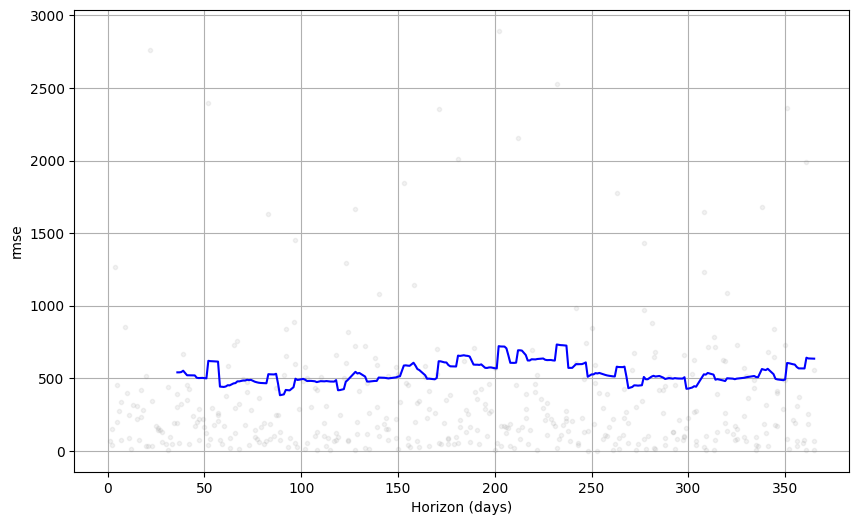

In [1109]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

# **LSTM Model for Price**

In [1110]:
df=pd.read_csv('/content/drive/MyDrive/MarketPricePrediction.csv')

In [1111]:
#Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,2011-12-01
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,2012-12-01
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,2013-12-01
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,2014-12-01
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,2015-12-01


In [1112]:
df.set_index('date', inplace=True)
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [1113]:
# Sort the data by date
df.sort_index(inplace=True)
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


In [1114]:
df.columns=df.columns.str.lower()

In [1115]:
# Calculate Median Price
df['median_price'] = df[['pricemin', 'pricemax', 'pricemod']].median(axis=1)

In [1116]:
df1=df.reset_index()['median_price']

In [1117]:
df1

0         226.0
1         186.0
2         243.0
3         254.0
4         269.0
          ...  
10222    1077.0
10223     575.0
10224     730.0
10225     806.0
10226    1309.0
Name: median_price, Length: 10227, dtype: float64

In [1118]:
# Remove duplicate indices by aggregating data (e.g., take mean for repeated dates)
df1 = df1.groupby(df.index).mean()

# If the index is not in datetime format, convert it
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df1.index = pd.to_datetime(df1.index)

In [1119]:
df1.tail()

date
2015-10-01    2838.788889
2015-11-01    2101.056180
2015-12-01    1427.516129
2016-01-01    1186.457831
2016-02-01     926.345679
Name: median_price, dtype: float64

In [1120]:
df1.shape

(242,)

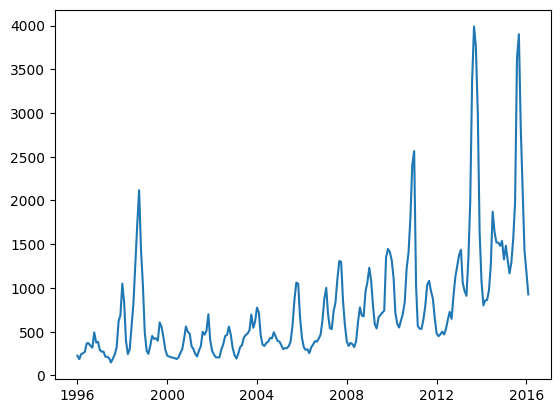

In [1121]:
# Plotting df1
plt.plot(df1)

In [1122]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [1123]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [1124]:
print(df1)

[[0.02025519]
 [0.00984121]
 [0.02468113]
 [0.02754498]
 [0.03145022]
 [0.05696447]
 [0.05722482]
 [0.04993504]
 [0.043947  ]
 [0.08950816]
 [0.05930762]
 [0.06165076]
 [0.03691756]
 [0.03197092]
 [0.03249162]
 [0.017131  ]
 [0.01687065]
 [0.01218436]
 [0.        ]
 [0.01218436]
 [0.0240563 ]
 [0.04524875]
 [0.12215599]
 [0.14073193]
 [0.23467161]
 [0.1754235 ]
 [0.06538244]
 [0.02475924]
 [0.03874001]
 [0.10891867]
 [0.17727488]
 [0.29663066]
 [0.41017198]
 [0.51255009]
 [0.33544082]
 [0.23328618]
 [0.08945031]
 [0.03511878]
 [0.02565153]
 [0.05026639]
 [0.07895217]
 [0.07011212]
 [0.07209078]
 [0.06477496]
 [0.11934422]
 [0.1062226 ]
 [0.07464221]
 [0.03864533]
 [0.02044454]
 [0.01755702]
 [0.01566357]
 [0.01417248]
 [0.01319972]
 [0.01030984]
 [0.01434526]
 [0.02770119]
 [0.03876604]
 [0.06964349]
 [0.10710779]
 [0.09114836]
 [0.0858893 ]
 [0.04824276]
 [0.04043228]
 [0.02587874]
 [0.01783394]
 [0.03558978]
 [0.04829483]
 [0.09114836]
 [0.0825734 ]
 [0.09452581]
 [0.14349518]
 [0.06

In [1125]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [1126]:
training_size,test_size

(193, 49)

In [1127]:
train_data

array([[0.02025519],
       [0.00984121],
       [0.02468113],
       [0.02754498],
       [0.03145022],
       [0.05696447],
       [0.05722482],
       [0.04993504],
       [0.043947  ],
       [0.08950816],
       [0.05930762],
       [0.06165076],
       [0.03691756],
       [0.03197092],
       [0.03249162],
       [0.017131  ],
       [0.01687065],
       [0.01218436],
       [0.        ],
       [0.01218436],
       [0.0240563 ],
       [0.04524875],
       [0.12215599],
       [0.14073193],
       [0.23467161],
       [0.1754235 ],
       [0.06538244],
       [0.02475924],
       [0.03874001],
       [0.10891867],
       [0.17727488],
       [0.29663066],
       [0.41017198],
       [0.51255009],
       [0.33544082],
       [0.23328618],
       [0.08945031],
       [0.03511878],
       [0.02565153],
       [0.05026639],
       [0.07895217],
       [0.07011212],
       [0.07209078],
       [0.06477496],
       [0.11934422],
       [0.1062226 ],
       [0.07464221],
       [0.038

In [1128]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [1129]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [1130]:
print(X_train.shape), print(y_train.shape)

(187, 5)
(187,)


(None, None)

In [1131]:
print(X_test.shape), print(ytest.shape)

(43, 5)
(43,)


(None, None)

In [1132]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [1133]:
# Define the learning rate
learning_rate = 0.001  # You can adjust this value as needed

# Create the optimizer with the custom learning rate
optimizer = Adam(learning_rate=learning_rate)

In [1134]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(5, 1)))
model.add(Dropout(0.2))  # Add dropout layer with 20% dropout rate
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [1135]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 5, 50)             10400     
                                                                 
 dropout_12 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_36 (LSTM)              (None, 5, 50)             20200     
                                                                 
 dropout_13 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_37 (LSTM)              (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 508

In [1136]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=500,batch_size=64,verbose=1)

Epoch 1/500
3/3 [==============================] - 8s 590ms/step - loss: 0.0221 - val_loss: 0.1839
Epoch 2/500
3/3 [==============================] - 0s 32ms/step - loss: 0.0166 - val_loss: 0.1574
Epoch 3/500
3/3 [==============================] - 0s 32ms/step - loss: 0.0121 - val_loss: 0.1287
Epoch 4/500
3/3 [==============================] - 0s 40ms/step - loss: 0.0108 - val_loss: 0.1052
Epoch 5/500
3/3 [==============================] - 0s 40ms/step - loss: 0.0117 - val_loss: 0.1012
Epoch 6/500
3/3 [==============================] - 0s 32ms/step - loss: 0.0116 - val_loss: 0.1090
Epoch 7/500
3/3 [==============================] - 0s 39ms/step - loss: 0.0107 - val_loss: 0.1192
Epoch 8/500
3/3 [==============================] - 0s 32ms/step - loss: 0.0106 - val_loss: 0.1272
Epoch 9/500
3/3 [==============================] - 0s 33ms/step - loss: 0.0107 - val_loss: 0.1292
Epoch 10/500
3/3 [==============================] - 0s 30ms/step - loss: 0.0107 - val_loss: 0.1281
Epoch 11/500
3/3 [

In [1137]:
## Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [1138]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## **Calculating MAE, MSE, RMSE**

In [1139]:
# Calculate error metrics for the test set
LSTM_price_mae = mean_absolute_error(ytest, test_predict)
LSTM_price_mse = mean_squared_error(ytest, test_predict)
LSTM_price_rmse = np.sqrt(LSTM_price_mse)

print(f'LSTM_price_MAE: {LSTM_price_mae}')
print(f'LSTM_price_MSE: {LSTM_price_mse}')
print(f'LSTM_price_RMSE: {LSTM_price_rmse}')

LSTM_price_MAE: 1175.7886801039945
LSTM_price_MSE: 1963411.4219645204
LSTM_price_RMSE: 1401.2178353006075


In [1140]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

678.4929080938845

In [1141]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1401.2178353006075

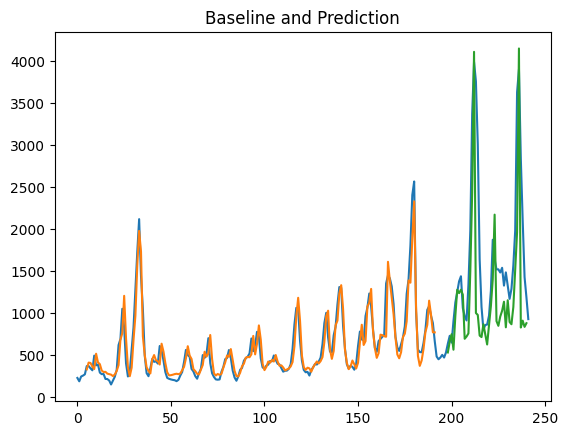

In [1142]:
### Plotting
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Baseline and Prediction')
plt.show()

In [1143]:
len(test_data)

49

In [1144]:
x_input=test_data[44:].reshape(1,-1)
x_input.shape

(1, 5)

In [1145]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [1146]:
temp_input

[0.7004935069657958,
 0.5084251554073466,
 0.33306933119529464,
 0.2703099207772713,
 0.202589848591376]

In [1147]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<30):

    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.12192765]
6
1 day input [0.50842516 0.33306933 0.27030992 0.20258985 0.12192765]
1 day output [[0.09642153]]
2 day input [0.33306933 0.27030992 0.20258985 0.12192765 0.09642153]
2 day output [[0.08177022]]
3 day input [0.27030992 0.20258985 0.12192765 0.09642153 0.08177022]
3 day output [[0.08236919]]
4 day input [0.20258985 0.12192765 0.09642153 0.08177022 0.08236919]
4 day output [[0.09751651]]
5 day input [0.12192765 0.09642153 0.08177022 0.08236919 0.09751651]
5 day output [[0.10491421]]
6 day input [0.09642153 0.08177022 0.08236919 0.09751651 0.10491421]
6 day output [[0.10326363]]
7 day input [0.08177022 0.08236919 0.09751651 0.10491421 0.10326363]
7 day output [[0.09480014]]
8 day input [0.08236919 0.09751651 0.10491421 0.10326363 0.09480014]
8 day output [[0.08343091]]
9 day input [0.09751651 0.10491421 0.10326363 0.09480014 0.08343091]
9 day output [[0.07368276]]
10 day input [0.10491421 0.10326363 0.09480014 0.08343091 0.07368276]
10 day output [[0.06766099]]
11 day input 

In [1148]:
day_new=np.arange(1,6)
day_pred=np.arange(6,36)

In [1149]:
len(df1)

242

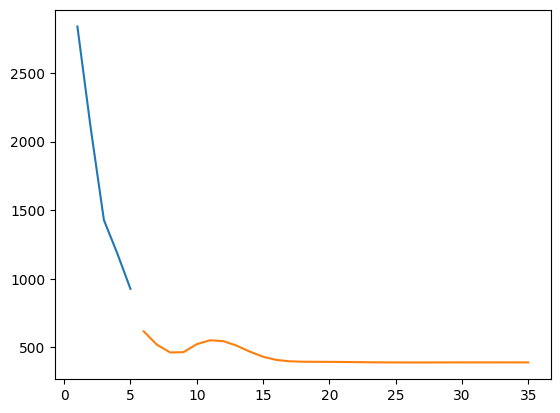

In [1150]:
plt.plot(day_new,scaler.inverse_transform(df1[237:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

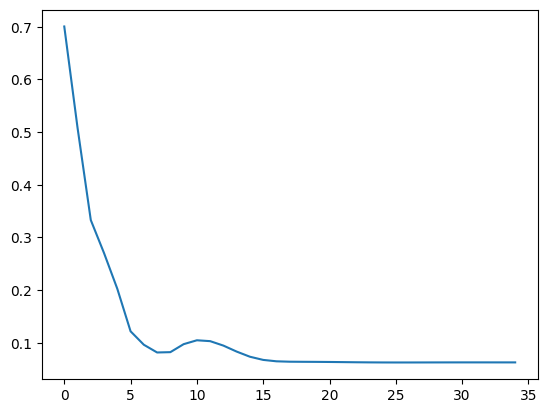

In [1151]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[237:])

In [1152]:
df3=scaler.inverse_transform(df3).tolist()

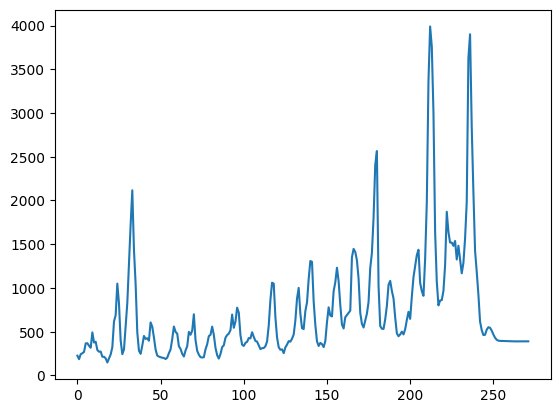

In [1153]:
plt.plot(df3)

In [1154]:
# prompt: convert df3 to dataframe

import pandas as pd
df3 = pd.DataFrame(df3, columns=['median_price'])


In [1155]:
df3.tail()

,median_price
267,390.009983
268,390.027554
269,390.000081
270,389.953377
271,389.908419


# **MODEL Evaluation for both Quantity and Price Forecasting**

In [1156]:
# Create a dictionary to store the error metrics for quantity
quantity_metrics = {
    'Model': ['ARIMA', 'SARIMAX', 'PROPHET', 'LSTM'],
    'MAE': [ARIMA_Qty_mae, SARIMAX_Qty_mae, Prophet_Qty_mae, LSTM_Qty_mae],
    'MSE': [ARIMA_Qty_mse, SARIMAX_Qty_mse, Prophet_Qty_mse, LSTM_Qty_mse],
    'RMSE': [ARIMA_Qty_rmse, SARIMAX_Qty_rmse, Prophet_Qty_rmse, LSTM_Qty_rmse]
}

# Create a DataFrame for quantity metrics
quantity_df = pd.DataFrame(quantity_metrics)

quantity_df=quantity_df.set_index('Model')

print("Evaluation of Quantity Metrics:")
print(quantity_df)

Evaluation of Quantity Metrics:
                  MAE           MSE          RMSE
Model                                            
ARIMA    18077.992139  5.159257e+08  22713.997036
SARIMAX  11753.369780  2.033790e+08  14261.101350
PROPHET  11432.407343  1.991221e+08  14111.062194
LSTM     76780.395480  6.179510e+09  78609.860969


In [1157]:
# Create a dictionary to store the error metrics for price
price_metrics = {
    'Model': ['ARIMA', 'SARIMAX', 'PROPHET', 'LSTM'],
    'MAE': [ARIMA_price_mae, SARIMAX_price_mae, Prophet_price_mae, LSTM_price_mae],
    'MSE': [ARIMA_price_mse, SARIMAX_price_mse, Prophet_price_mse, LSTM_price_mse],
    'RMSE': [ARIMA_price_rmse, SARIMAX_price_rmse, Prophet_price_rmse, LSTM_price_rmse]
}

# Create a DataFrame for price metrics
price_df = pd.DataFrame(price_metrics)
price_df=price_df.set_index('Model')
print("\nEvaluation of Price Metrics:")
print(price_df)



Evaluation of Price Metrics:
                 MAE           MSE         RMSE
Model                                          
ARIMA     899.862680  1.582562e+06  1257.999148
SARIMAX   890.316787  1.555606e+06  1247.239280
PROPHET   508.817160  6.354909e+05   797.176847
LSTM     1175.788680  1.963411e+06  1401.217835


# **CONCLUSION**

## **Quantity Forecasting**


1. The SARIMAX and Prophet models outperform ARIMA and LSTM in terms of MAE, MSE, and RMSE metrics for quantity forecasting.
2. Among the models, Prophet demonstrates the lowest error metrics, indicating its superior performance in accurately predicting the quantity of commodities for future months.
3. LSTM, although visually accurate, exhibits significantly higher error metrics compared to the other models, suggesting potential overfitting or limitations in capturing the underlying patterns in the data.

## **Price Forecasting**

1. Prophet emerges as the top-performing model for price forecasting, with the lowest MAE, MSE, and RMSE values.
2. ARIMA and SARIMAX also provide competitive results, with slightly higher error metrics compared to Prophet.
3. LSTM, similar to its performance in quantity forecasting, exhibits higher error metrics, indicating its limitations in accurately predicting commodity prices.

\
#### **Based on the evaluation, Prophet appears to be the most suitable model for both quantity and price forecasting, offering the most accurate predictions among the evaluated models.**

================================================================================================================